In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from datetime import datetime

# import warnings
# warnings.filterwarnings("ignore")


In [81]:
data = pd.read_csv('./AAPL.csv')
print(data.shape)
print(data.sample(7))

data.info()
data['Date'] = pd.to_datetime(data['Date'])

(1258, 7)
            Date        Open        High         Low       Close   Adj Close  \
617   2020-09-08  113.949997  118.989998  112.680000  112.820000  111.120079   
240   2019-03-12   45.000000   45.667500   44.842499   45.227501   43.772869   
985   2022-02-23  165.539993  166.149994  159.750000  160.070007  159.106186   
569   2020-06-30   90.019997   91.495003   90.000000   91.199997   89.664177   
934   2021-12-09  174.910004  176.750000  173.919998  174.559998  173.288162   
1192  2022-12-19  135.110001  135.199997  131.320007  132.369995  132.168198   
1060  2022-06-10  140.279999  140.759995  137.059998  137.130005  136.504578   

         Volume  
617   231366600  
240   129870400  
985    90009200  
569   140223200  
934   108923700  
1192   79592600  
1060   91437900  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       125

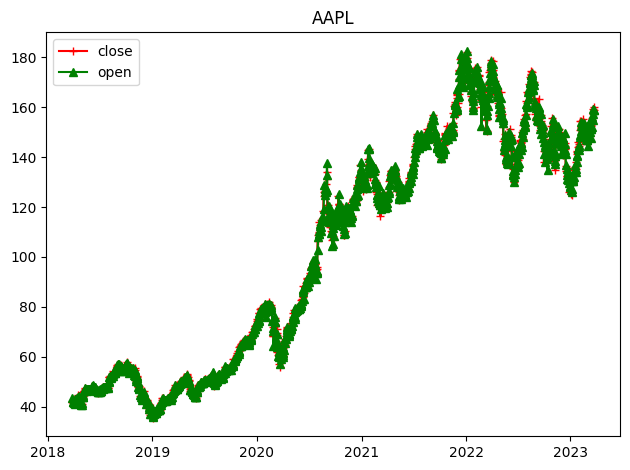

In [82]:
plt.figure()
plt.plot(data['Date'], data['Close'], c="r", label="close", marker="+")
plt.plot(data['Date'], data['Open'], c="g", label="open", marker="^")
plt.title("AAPL")
plt.legend()
plt.tight_layout()


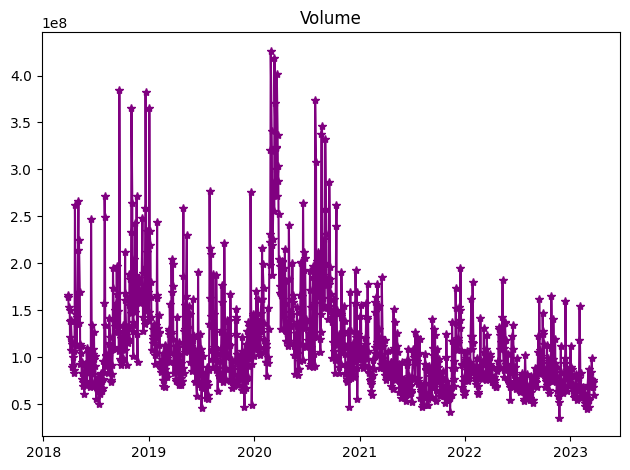

In [83]:

plt.figure()
plt.plot(data['Date'], data['Volume'], c='purple', marker='*')
plt.title("Volume")
plt.tight_layout()

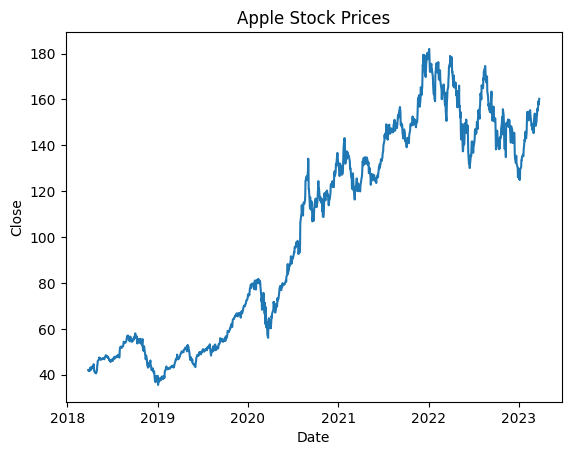

In [84]:
prediction_range = data.loc[(data['Date'] > datetime(2018,3,27))
 & (data['Date']<datetime(2023,3,27))]
plt.plot(data['Date'],data['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [85]:
close_data = data.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1196


In [86]:

from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
  
train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []
  
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
  
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [87]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

2023-03-27 22:32:14.043692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-27 22:32:14.045464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-27 22:32:14.046316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd077338460>>

In [88]:

model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10


2023-03-27 22:32:14.410623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-27 22:32:14.412551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-27 22:32:14.413875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

36/36 [==============================] - 5s 65ms/step - loss: 0.0352
Epoch 2/10
36/36 [==============================] - 2s 66ms/step - loss: 0.0141
Epoch 3/10
36/36 [==============================] - 2s 66ms/step - loss: 0.0116
Epoch 4/10
36/36 [==============================] - 2s 65ms/step - loss: 0.0111
Epoch 5/10
36/36 [==============================] - 2s 62ms/step - loss: 0.0112
Epoch 6/10
36/36 [==============================] - 2s 61ms/step - loss: 0.0100
Epoch 7/10
36/36 [==============================] - 2s 63ms/step - loss: 0.0093
Epoch 8/10
36/36 [==============================] - 2s 62ms/step - loss: 0.0090
Epoch 9/10
36/36 [==============================] - 2s 63ms/step - loss: 0.0088
Epoch 10/10
36/36 [==============================] - 2s 63ms/step - loss: 0.0088


In [89]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  
# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
  
# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2023-03-27 22:32:39.883983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-27 22:32:39.885723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-27 22:32:39.886773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 23ms/step
MSE 27.20456210427987
RMSE 5.215799277606441


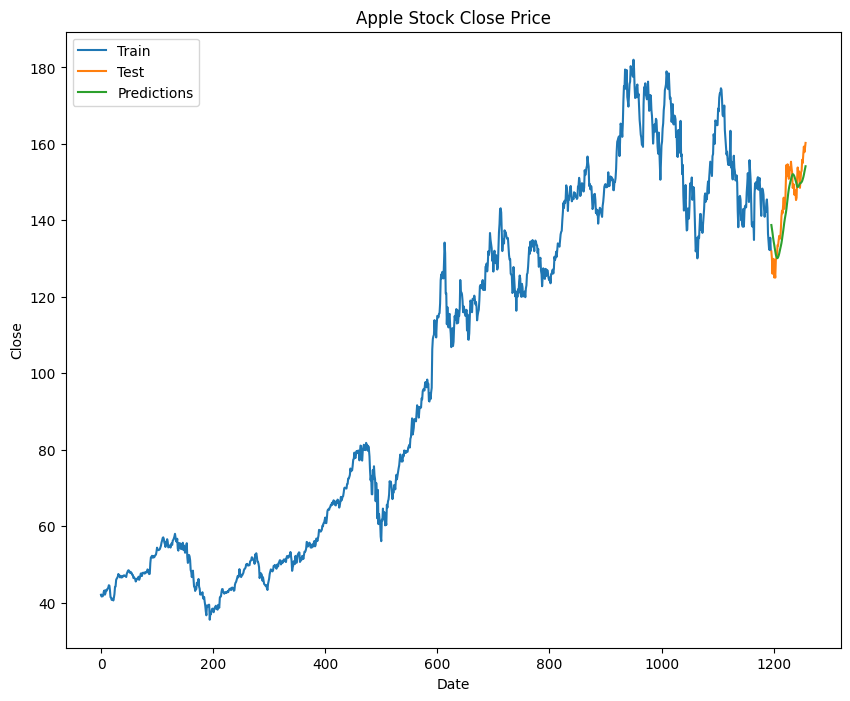

In [90]:
train = data[:training]
test = data[training:]
test['Predictions'] = predictions
  
plt.figure(figsize=(10, 8))
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])